In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
path = r"C:\Users\sniperpoint\Desktop\currency\notes_data"


In [3]:
import pathlib
data_dir = pathlib.Path(path)
data_dir

WindowsPath('C:/Users/sniperpoint/Desktop/currency/notes_data')

In [4]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('C:/Users/sniperpoint/Desktop/currency/notes_data/1Hundred_new/1.jpg'),
 WindowsPath('C:/Users/sniperpoint/Desktop/currency/notes_data/1Hundred_new/10.jpg'),
 WindowsPath('C:/Users/sniperpoint/Desktop/currency/notes_data/1Hundred_new/11.jpg'),
 WindowsPath('C:/Users/sniperpoint/Desktop/currency/notes_data/1Hundred_new/16.jpg'),
 WindowsPath('C:/Users/sniperpoint/Desktop/currency/notes_data/1Hundred_new/2.jpg')]

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

177


In [6]:
fifty = list(data_dir.glob('Fiftynote_new/*'))
fifty[:5]

[WindowsPath('C:/Users/sniperpoint/Desktop/currency/notes_data/Fiftynote_new/1.jpg'),
 WindowsPath('C:/Users/sniperpoint/Desktop/currency/notes_data/Fiftynote_new/11.jpg'),
 WindowsPath('C:/Users/sniperpoint/Desktop/currency/notes_data/Fiftynote_new/12.jpg'),
 WindowsPath('C:/Users/sniperpoint/Desktop/currency/notes_data/Fiftynote_new/15.jpg'),
 WindowsPath('C:/Users/sniperpoint/Desktop/currency/notes_data/Fiftynote_new/2.jpg')]

In [7]:
str(fifty[1])

'C:\\Users\\sniperpoint\\Desktop\\currency\\notes_data\\Fiftynote_new\\11.jpg'

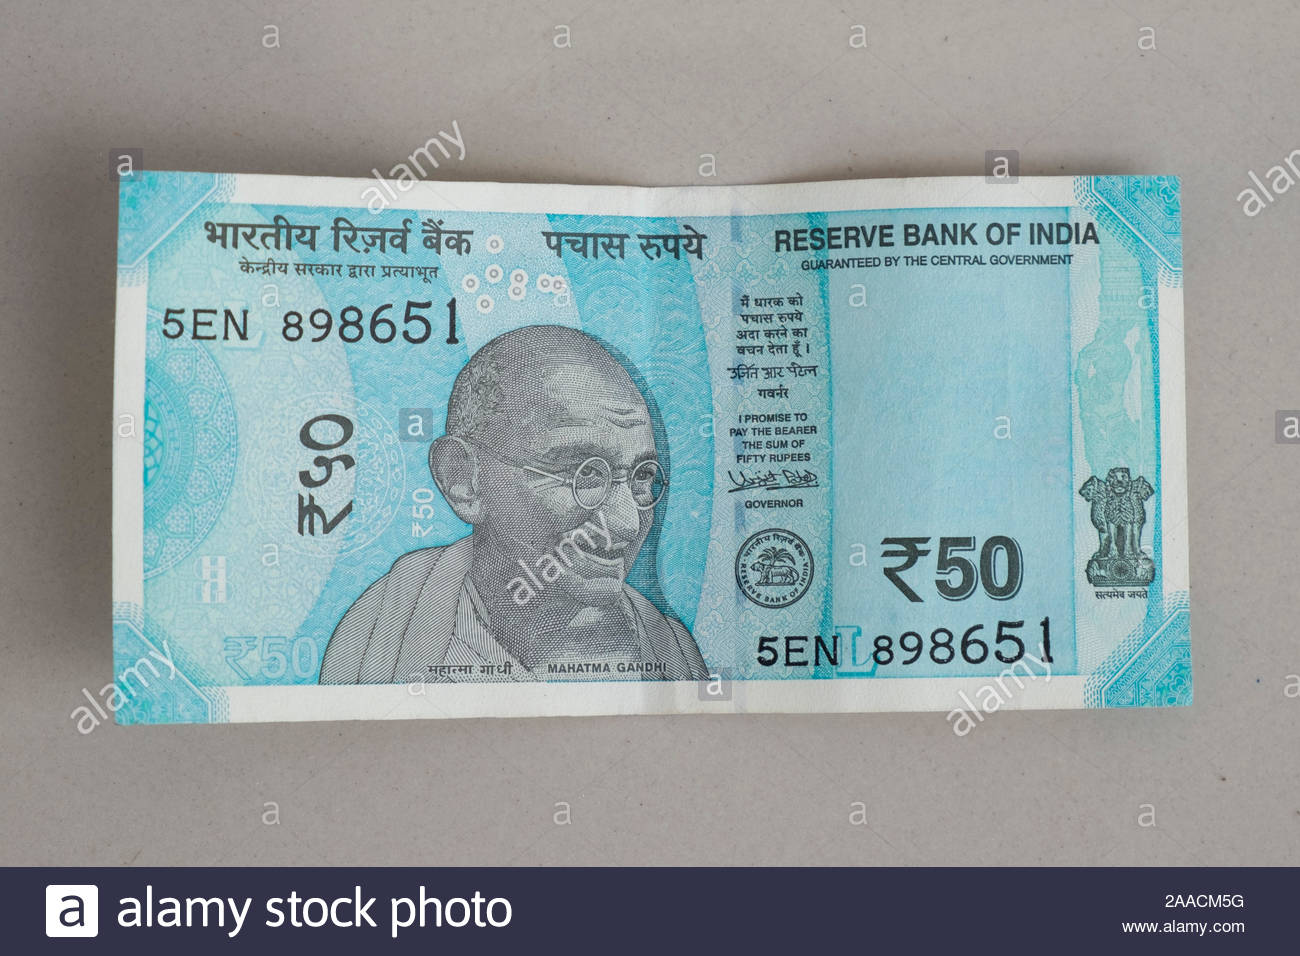

In [8]:
PIL.Image.open(str(fifty[1]))

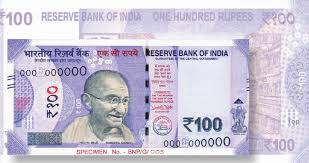

In [9]:
hundred = list(data_dir.glob('1Hundred_new/*'))
PIL.Image.open(str(hundred[5]))

In [10]:
#create dic for all botes to store directory
note_image_dic = {
    'ten_new' : list(data_dir.glob('Tennote_new/*')),
    'ten_old' : list(data_dir.glob('Tennote_old/*')),
    'twenty_new' : list(data_dir.glob('Twentynote_new/*')),
    'twenty_old' : list(data_dir.glob('Twentynote_old/*')),
    'fifty_new' : list(data_dir.glob('Fiftynote_new/*')),
    'fifty_old' : list(data_dir.glob('Fiftynote_old/*')),
    'one_hundred_new' : list(data_dir.glob('1Hundred_new/*')),
    'one_hundred_old' : list(data_dir.glob('1Hundred_old/*')),
    'two_hundred' : list(data_dir.glob('2Hundrednote/*')),
    'five_hundred' : list(data_dir.glob('5Hundrednote/*')),
    'two_thousand' : list(data_dir.glob('2Thousandnote/*'))
}

In [11]:
#create classes for each note
note_class = {
    'ten_new' : 0,
    'ten_old' : 1,
    'twenty_new' : 2,
    'twenty_old' : 3,
    'fifty_new' : 4,
    'fifty_old' : 5,
    'one_hundred_new' : 6,
    'one_hundred_old' : 7,
    'two_hundred' : 8,
    'five_hundred' : 9,
    'two_thousand' : 10
}

In [12]:
note_image_dic['twenty_new'][0]

WindowsPath('C:/Users/sniperpoint/Desktop/currency/notes_data/Twentynote_new/1.jpg')

In [13]:
sample= cv2.imread(str(note_image_dic['twenty_new'][0]))
sample.shape

(225, 224, 3)

In [14]:
sample = cv2.resize(sample,(200,200))

In [15]:
sample.shape

(200, 200, 3)

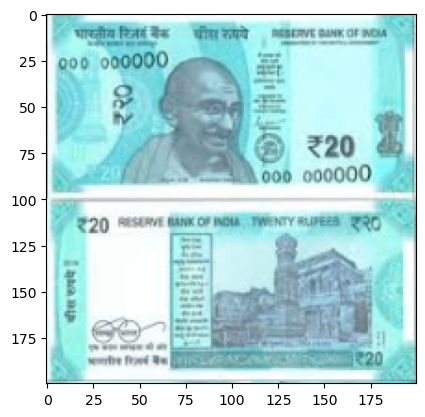

In [16]:
plt.imshow(sample)
plt.show()

In [17]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')


In [18]:
#create tensors and labels for input

for note, note_file in note_image_dic.items():
    for note_path in note_file:
        sample= cv2.imread(str(note_path))
        resized_sample = cv2.resize(sample,(200, 200))
        
        x = resized_sample.reshape((1,) + resized_sample.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

        i = 0
        
        d = r'C:\Users\sniperpoint\Desktop\currency\notes_data\test' + "\\" + note
        print(d)
        for batch in datagen.flow(x, batch_size=1,
                                  save_to_dir=d,
                                  save_prefix=note, save_format='jpeg'):
            i += 1
            if i > 10:
                break  # otherwise the generator would loop indefinitely
        


C:\Users\sniperpoint\Desktop\currency\notes_data\test\ten_new
C:\Users\sniperpoint\Desktop\currency\notes_data\test\ten_new
C:\Users\sniperpoint\Desktop\currency\notes_data\test\ten_new
C:\Users\sniperpoint\Desktop\currency\notes_data\test\ten_new
C:\Users\sniperpoint\Desktop\currency\notes_data\test\ten_new
C:\Users\sniperpoint\Desktop\currency\notes_data\test\ten_new
C:\Users\sniperpoint\Desktop\currency\notes_data\test\ten_new
C:\Users\sniperpoint\Desktop\currency\notes_data\test\ten_new
C:\Users\sniperpoint\Desktop\currency\notes_data\test\ten_new
C:\Users\sniperpoint\Desktop\currency\notes_data\test\ten_new
C:\Users\sniperpoint\Desktop\currency\notes_data\test\ten_new
C:\Users\sniperpoint\Desktop\currency\notes_data\test\ten_new
C:\Users\sniperpoint\Desktop\currency\notes_data\test\ten_new
C:\Users\sniperpoint\Desktop\currency\notes_data\test\ten_new
C:\Users\sniperpoint\Desktop\currency\notes_data\test\ten_new
C:\Users\sniperpoint\Desktop\currency\notes_data\test\ten_old
C:\Users

C:\Users\sniperpoint\Desktop\currency\notes_data\test\five_hundred
C:\Users\sniperpoint\Desktop\currency\notes_data\test\five_hundred
C:\Users\sniperpoint\Desktop\currency\notes_data\test\five_hundred
C:\Users\sniperpoint\Desktop\currency\notes_data\test\five_hundred
C:\Users\sniperpoint\Desktop\currency\notes_data\test\five_hundred
C:\Users\sniperpoint\Desktop\currency\notes_data\test\five_hundred
C:\Users\sniperpoint\Desktop\currency\notes_data\test\five_hundred
C:\Users\sniperpoint\Desktop\currency\notes_data\test\five_hundred
C:\Users\sniperpoint\Desktop\currency\notes_data\test\five_hundred
C:\Users\sniperpoint\Desktop\currency\notes_data\test\five_hundred
C:\Users\sniperpoint\Desktop\currency\notes_data\test\five_hundred
C:\Users\sniperpoint\Desktop\currency\notes_data\test\five_hundred
C:\Users\sniperpoint\Desktop\currency\notes_data\test\five_hundred
C:\Users\sniperpoint\Desktop\currency\notes_data\test\five_hundred
C:\Users\sniperpoint\Desktop\currency\notes_data\test\five_hun

In [19]:
path = r'C:\Users\sniperpoint\Desktop\currency\notes_data\test'
import pathlib
data_dir = pathlib.Path(path)
data_dir

WindowsPath('C:/Users/sniperpoint/Desktop/currency/notes_data/test')

In [20]:
image_count = len(list(data_dir.glob('*/*.jpeg')))
print(image_count)

1934


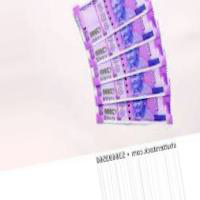

In [21]:
two_th = list(data_dir.glob('two_thousand/*'))
two_th[:5]
PIL.Image.open(str(two_th[1]))

In [22]:
#create dic for all botes to store directory
note_image_dic1 = {
    'ten_new' : list(data_dir.glob('ten_new/*')),
    'ten_old' : list(data_dir.glob('ten_old/*')),
    'twenty_new' : list(data_dir.glob('twenty_new/*')),
    'twenty_old' : list(data_dir.glob('twenty_old/*')),
    'fifty_new' : list(data_dir.glob('fifty_new/*')),
    'fifty_old' : list(data_dir.glob('fifty_old/*')),
    'one_hundred_new' : list(data_dir.glob('one_hundred_new/*')),
    'one_hundred_old' : list(data_dir.glob('one_hundred_old/*')),
    'two_hundred' : list(data_dir.glob('two_hundred/*')),
    'five_hundred' : list(data_dir.glob('five_hundred/*')),
    'two_thousand' : list(data_dir.glob('two_thousand/*'))
}

In [23]:
X_train, y_train = [], []
X_test, y_test = [], []
for note, note_file in note_image_dic1.items():
    train_split = int(0.8*len(note_file))
  
    for note_path in note_file[:train_split]:
        sample= cv2.imread(str(note_path))
        
        X_train.append(sample)
        y_train.append(note_class[note])
        
    for note_path in note_file[train_split:]:
        sample= cv2.imread(str(note_path))
        
        X_test.append(sample)
        y_test.append(note_class[note])
        

In [24]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [25]:
len(X_train) + len(X_test)

1934

In [45]:
len(X_test)

389

In [27]:
X_train_scaled = X_train / X_train[0][1].max()
X_test_scaled = X_test / X_test[0][1].max()

In [60]:
num_classes = 11

model = Sequential([
 
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=5) 

Epoch 1/5
49/49 [==============================] - 35s 693ms/step - loss: 4.6830 - accuracy: 0.1508
Epoch 2/5
49/49 [==============================] - 49s 995ms/step - loss: 2.0886 - accuracy: 0.2958
Epoch 3/5
49/49 [==============================] - 51s 1s/step - loss: 1.4736 - accuracy: 0.5502
Epoch 4/5
49/49 [==============================] - 56s 1s/step - loss: 1.0567 - accuracy: 0.6874
Epoch 5/5
49/49 [==============================] - 54s 1s/step - loss: 0.7739 - accuracy: 0.7566


In [39]:
model.evaluate(X_test_scaled,y_test)

13/13 [==============================] - 3s 252ms/step - loss: 0.4427 - accuracy: 0.8329


[0.4426889419555664, 0.8329048752784729]

In [55]:
y_pred = model.predict(X_test_scaled)
y_pred

13/13 [==============================] - 2s 166ms/step


array([[  9.082942  ,   3.2316601 ,   2.3539088 , ...,   8.040387  ,
          1.6283095 ,  -4.2059774 ],
       [  3.9722629 ,   2.6659787 ,   4.4644365 , ...,   3.3453345 ,
          5.7945952 ,  -5.8854375 ],
       [  5.4103456 ,   3.75334   ,   3.046318  , ...,   4.4879146 ,
          4.9837246 ,  -6.138505  ],
       ...,
       [ -0.8455771 ,  -0.5989119 ,  -1.6871125 , ...,   2.1255753 ,
         -4.7459755 ,  15.076821  ],
       [  1.0010997 ,  -3.3555925 ,  -0.8806339 , ...,   2.444132  ,
         -1.9214364 ,  10.689594  ],
       [ -3.6055    ,   0.04932821,  -2.1295762 , ...,   5.6341634 ,
        -10.711221  ,  20.559454  ]], dtype=float32)

In [59]:
score = [np.argmax(tf.nn.softmax(y_pred[i])) for i in range(len(y_pred))]
print(score)

[0, 9, 0, 3, 9, 0, 0, 9, 8, 0, 8, 9, 0, 0, 0, 0, 1, 0, 0, 2, 8, 2, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 9, 1, 1, 1, 1, 0, 1, 1, 1, 8, 1, 8, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 3, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 9, 2, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 8, 1, 3, 3, 3, 3, 3, 3, 3, 8, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 9, 5, 5, 0, 5, 5, 5, 8, 2, 0, 5, 5, 5, 5, 7, 5, 5, 6, 6, 6, 6, 6, 6, 10, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 7, 7, 2, 8, 0, 8, 8, 1, 8, 8, 8, 8, 0, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 0, 8, 5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 1, 1, 8, 1, 0, 8, 8, 8, 8, 8, 8, 2, 8, 3, 0, 8, 8, 8, 8, 9, 9, 7, 7, 9, 9, 9, 9, 9, 9, 8, 9, 9, 9, 9, 8, 9, 9, 9, 9, 2, 9, 7, 9, 9, 7, 9, 8, 9, 7, 9, 9, 9, 7, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 7, 9, 9, 7, 9, 9, 9, 9,

In [52]:
y_test

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,
        8,  8,  8,  8,  8